Following this tutorial  
https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

In [64]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [2]:
df = pd.read_csv("Consumer_Complaints.csv")

/home/saharsh/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head(10000)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,04/29/2019,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,NaN,NaN,NAVY FEDERAL CREDIT UNION,VA,221XX,NaN,NaN,Web,04/29/2019,In progress,Yes,NaN,3226245
1,04/29/2019,Vehicle loan or lease,Loan,Getting a loan or lease,Credit denial,NaN,NaN,ALLY FINANCIAL INC.,NC,282XX,NaN,NaN,Web,04/29/2019,In progress,Yes,NaN,3225701
2,04/29/2019,Student loan,Federal student loan servicing,Struggling to repay your loan,Can't get other flexible options for repaying ...,NaN,NaN,AES/PHEAA,PA,191XX,NaN,NaN,Web,04/29/2019,Closed with explanation,Yes,NaN,3226143
3,04/29/2019,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company has responded to the consumer and the ...,"Credit Protection Association, L.P.",FL,34243,"Older American, Servicemember",NaN,Phone,04/29/2019,Closed with explanation,Yes,NaN,3226078
4,04/29/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,Company believes it acted appropriately as aut...,"Certified Credit Reporting, Inc.",UT,NaN,NaN,NaN,Web,04/29/2019,Closed with explanation,Yes,NaN,3225663
5,04/29/2019,Debt collection,I do not know,Attempts to collect debt not owed,Debt was result of identity theft,NaN,Company believes the complaint is the result o...,"CCS Financial Services, Inc.",CA,95219,NaN,Consent not provided,Web,04/29/2019,Closed with explanation,Yes,NaN,3225702
6,04/29/2019,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company believes complaint caused principally ...,Perfection Collection,OH,454XX,NaN,Consent not provided,Web,04/29/2019,Closed with explanation,Yes,NaN,3225665
7,04/29/2019,Mortgage,Other type of mortgage,Trouble during payment process,NaN,NaN,NaN,NATIONSTAR MORTGAGE,NY,117XX,NaN,NaN,Referral,04/29/2019,Closed with explanation,Yes,NaN,3226876
8,04/29/2019,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,NaN,Company believes it acted appropriately as aut...,"Shellpoint Partners, LLC",OH,44720,NaN,Consent not provided,Web,04/29/2019,Closed with explanation,Yes,NaN,3226435
9,04/29/2019,Debt collection,Other debt,Written notification about debt,Didn't receive enough information to verify debt,NaN,NaN,"Diversified Consultants, Inc.",OH,450XX,NaN,NaN,Web,04/29/2019,In progress,Yes,NaN,3225867


In [4]:
lables1 = set()
for x in df["Product"]:
    lables1.add(x)


In [5]:
print(lables1)


{'Student loan', 'Checking or savings account', 'Money transfers', 'Credit reporting', 'Credit card or prepaid card', 'Credit card', 'Credit reporting, credit repair services, or other personal consumer reports', 'Debt collection', 'Virtual currency', 'Other financial service', 'Mortgage', 'Consumer Loan', 'Prepaid card', 'Vehicle loan or lease', 'Payday loan, title loan, or personal loan', 'Money transfer, virtual currency, or money service', 'Payday loan', 'Bank account or service'}


In [7]:
col = ['Product', 'Consumer complaint narrative']
df = df[col]
df.dropna(subset=['Consumer complaint narrative'], inplace=True)

In [10]:
df.head(10)

,Product,Consumer complaint narrative
26472,Debt collection,XX/XX/XXXX - called Rushmore Loan Management S...
27441,"Credit reporting, credit repair services, or o...",I sent a certified letter with dispute attache...
27717,Debt collection,I noticed a debt on my credit file for a XXXX ...
27775,Debt collection,See thru XXXX XXXX that XXXX is showing a debt...
27947,Debt collection,"This account was not opened by me, I am a vict..."
27965,Debt collection,XXXX XXXX XXXX are attempting to collect a de...
27981,Debt collection,"On XX/XX/2019, I received a call from XXXX XXX..."
28129,Debt collection,This has been going on for more than XXXX year...
28145,Debt collection,I received a call on XX/XX/19 from a angry wom...
28207,Debt collection,Upon looking at my credit file in XXXX of XXXX...


In [11]:
df.columns

Index(['Product', 'Consumer complaint narrative'], dtype='object')

In [13]:
df['category_id'] = df['Product'].factorize()[0] 
#this returns lables and unique values

In [18]:
df.head(10)

,Product,Consumer_complaint_narrative,category_id
26472,Debt collection,XX/XX/XXXX - called Rushmore Loan Management S...,0
27441,"Credit reporting, credit repair services, or o...",I sent a certified letter with dispute attache...,1
27717,Debt collection,I noticed a debt on my credit file for a XXXX ...,0
27775,Debt collection,See thru XXXX XXXX that XXXX is showing a debt...,0
27947,Debt collection,"This account was not opened by me, I am a vict...",0
27965,Debt collection,XXXX XXXX XXXX are attempting to collect a de...,0
27981,Debt collection,"On XX/XX/2019, I received a call from XXXX XXX...",0
28129,Debt collection,This has been going on for more than XXXX year...,0
28145,Debt collection,I received a call on XX/XX/19 from a angry wom...,0
28207,Debt collection,Upon looking at my credit file in XXXX of XXXX...,0


In [19]:
category_id_df =  df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')

In [26]:
category_id_df.values

array([['Debt collection', 0],
       ['Credit reporting, credit repair services, or other personal consumer reports',
        1],
       ['Checking or savings account', 2],
       ['Mortgage', 3],
       ['Student loan', 4],
       ['Credit card or prepaid card', 5],
       ['Money transfer, virtual currency, or money service', 6],
       ['Payday loan, title loan, or personal loan', 7],
       ['Vehicle loan or lease', 8],
       ['Credit card', 9],
       ['Credit reporting', 10],
       ['Bank account or service', 11],
       ['Money transfers', 12],
       ['Consumer Loan', 13],
       ['Prepaid card', 14],
       ['Payday loan', 15],
       ['Other financial service', 16],
       ['Virtual currency', 17]], dtype=object)

In [25]:
category_to_id = dict(category_id_df.values)

In [29]:
id_to_category = {}
for values,lable in  category_to_id.items():
    id_to_category[lable] = values

In [32]:
print(category_to_id.items(),end = "\n\n")
print(id_to_category.items())

dict_items([('Debt collection', 0), ('Credit reporting, credit repair services, or other personal consumer reports', 1), ('Checking or savings account', 2), ('Mortgage', 3), ('Student loan', 4), ('Credit card or prepaid card', 5), ('Money transfer, virtual currency, or money service', 6), ('Payday loan, title loan, or personal loan', 7), ('Vehicle loan or lease', 8), ('Credit card', 9), ('Credit reporting', 10), ('Bank account or service', 11), ('Money transfers', 12), ('Consumer Loan', 13), ('Prepaid card', 14), ('Payday loan', 15), ('Other financial service', 16), ('Virtual currency', 17)])

dict_items([(0, 'Debt collection'), (1, 'Credit reporting, credit repair services, or other personal consumer reports'), (2, 'Checking or savings account'), (3, 'Mortgage'), (4, 'Student loan'), (5, 'Credit card or prepaid card'), (6, 'Money transfer, virtual currency, or money service'), (7, 'Payday loan, title loan, or personal loan'), (8, 'Vehicle loan or lease'), (9, 'Credit card'), (10, 'Cre

                                                    Consumer_complaint_narrative  \
Product                                                                            
Bank account or service                                                    14885   
Checking or savings account                                                12802   
Consumer Loan                                                               9474   
Credit card                                                                18838   
Credit card or prepaid card                                                21257   
Credit reporting                                                           31588   
Credit reporting, credit repair services, or ot...                         91823   
Debt collection                                                            86270   
Money transfer, virtual currency, or money service                          5450   
Money transfers                                                             

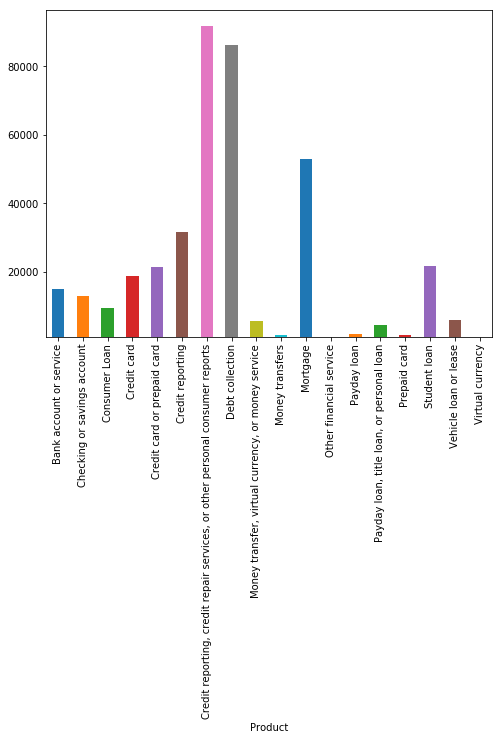

In [47]:
fig  = plt.figure(figsize=(8,6), edgecolor='b')
print(df.groupby('Product').count())
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=1000) # don't exactly know what happened by adding Consumer_complaint_narrative
plt.show()

In [50]:
tfidf = TfidfVectorizer( sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

Apply sublinear tf scaling, i.e. replace tf with 1 + log(tf).

In [53]:
features = tfidf.fit_transform(df.Consumer_complaint_narrative)

In [54]:
print(features)

  (0, 710317)	0.05433601095289453
  (0, 710597)	0.03167653582774
  (0, 102319)	0.0354698392823936
  (0, 575282)	0.14518149559757285
  (0, 382870)	0.037170383065237046
  (0, 398170)	0.0609252341549998
  (0, 594930)	0.037215604984099246
  (0, 464317)	0.030884645993362738
  (0, 394972)	0.02473418366493854
  (0, 370913)	0.02572009853403456
  (0, 473113)	0.05066457484164741
  (0, 0)	0.039594394830276075
  (0, 530134)	0.03312285929106529
  (0, 263248)	0.021852792404200058
  (0, 14310)	0.09555897943193092
  (0, 658690)	0.023493097637093563
  (0, 455446)	0.03617837753700953
  (0, 525116)	0.03940129127769919
  (0, 393803)	0.03977095797455938
  (0, 446480)	0.04358809152875081
  (0, 467704)	0.045494698086772124
  (0, 702759)	0.058533147088578215
  (0, 182896)	0.07553089806383383
  (0, 660281)	0.08487905472075043
  (0, 291270)	0.02110349975987947
  :	:
  (382048, 556717)	0.06928033152065181
  (382048, 266378)	0.06854391284062655
  (382048, 538735)	0.06820586660588145
  (382048, 236243)	0.066244775

In [55]:
labels = df.category_id
features.shape

(382049, 724778)

In [59]:
def printIT(s,t):
    print(s,end = " ")
    print(t)

In [63]:
N = 2
for Product,category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features,labels == category_id)
    printIT("featues_chi2",features_chi2)
    
    indices = np.argsort(features_chi2[0])
    printIT("indices",indices)
    
    feature_names = np.array(tfidf.get_feature_names())[indices]
    printIT("features_names",feature_names)
    
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    printIT("unigram",unigrams)
    printIT("bigrams", bigrams)
    print("# '{}':".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

featues_chi2 (array([7.91813304e+01, 1.16356238e+01, 1.24967341e-01, ...,
       4.54882303e-02, 4.05727060e-01, 3.27838144e-01]), array([5.66630148e-19, 6.47006428e-04, 7.23708232e-01, ...,
       8.31108807e-01, 5.24146287e-01, 5.66934849e-01]))
indices [509216  76393 358770 ... 128433  79306 453780]
features_names ['provide promised' 'away wanted' 'know problem' ... 'checking account'
 'bank' 'overdraft']


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



featues_chi2 (array([1.42673604e+02, 2.52906820e+01, 2.41505549e-02, ...,
       3.89019295e-02, 3.46981304e-01, 2.80370027e-01]), array([6.92781574e-33, 4.93085042e-07, 8.76502446e-01, ...,
       8.43643079e-01, 5.55826935e-01, 5.96458791e-01]))
indices [433873 630771 245135 ... 453780 128433 206586]
features_names ['noticed entry' 'suffered hands' 'ethics xxxx' ... 'overdraft'
 'checking account' 'deposit']


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



featues_chi2 (array([6.58724966, 0.16456804, 0.08306087, ..., 0.02853185, 0.25448659,
       0.20563186]), array([0.01027117, 0.68498519, 0.77319148, ..., 0.86586449, 0.6139335 ,
       0.65021287]))
indices [246426 121957 591104 ...  48601 686270 108689]
features_names ['evidently' 'charge end' 'sent just' ... 'ally' 'vehicle' 'car']


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



featues_chi2 (array([4.27082963e+01, 1.24305184e+00, 1.69415297e-01, ...,
       5.81950566e-02, 2.50983667e-02, 2.96874862e-04]), array([6.35422221e-11, 2.64883700e-01, 6.80631976e-01, ...,
       8.09371811e-01, 8.74122199e-01, 9.86253084e-01]))
indices [103755 330709 627077 ... 393470 178578 109575]
features_names ['called seeing' 'indicated reporting' 'strong belief' ... 'macy'
 'credit card' 'card']


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



featues_chi2 (array([1.03800852e+02, 6.90961350e+00, 9.55735339e-03, ...,
       2.34013249e-01, 5.89644566e-01, 4.76448330e-01]), array([2.23708888e-24, 8.57335212e-03, 9.22121507e-01, ...,
       6.28563901e-01, 4.42556596e-01, 4.90035497e-01]))
indices [721973 542854 686694 ...  50118 178578 109575]
features_names ['year thats' 'removed didnt' 'vehicle parked' ... 'american express'
 'credit card' 'card']


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



featues_chi2 (array([1.53838607e+02, 1.60404974e-01, 2.14476792e-03, ...,
       1.01132962e-01, 9.02043873e-01, 7.28875192e-01]), array([2.51188451e-35, 6.88783940e-01, 9.63061863e-01, ...,
       7.50474248e-01, 3.42234264e-01, 3.93248026e-01]))
indices [421872  70308 700133 ... 663980 240487 249358]
features_names ['moved days' 'attempts refund' 'went asking' ... 'transunion' 'equifax'
 'experian']


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



featues_chi2 (array([3.49073905e+02, 4.25548467e+00, 1.54373456e-02, ...,
       1.19260145e-01, 3.16636072e+00, 2.55850280e+00]), array([6.74233892e-78, 3.91237826e-02, 9.01119619e-01, ...,
       7.29838311e-01, 7.51697708e-02, 1.09702431e-01]))
indices [482712 511067 699162 ... 546820 338566 240487]
features_names ['place stated' 'providing numerous' 'weekly collection' ... 'report'
 'inquiries' 'equifax']


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



featues_chi2 (array([13.58480584,  7.71292214,  0.3279023 , ...,  0.32726741,
       27.48638708, 21.49984964]), array([2.28023702e-04, 5.48269299e-03, 5.66896909e-01, ...,
       5.67272585e-01, 1.58204137e-07, 3.53856407e-06]))
indices [523238 471405 578270 ... 139567 140329 194262]
features_names ['reasons needed' 'payments decreased' 'sale tickets' ... 'collect'
 'collection' 'debt']


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



featues_chi2 (array([2.76501552e+01, 6.33004543e-01, 4.72709315e-02, ...,
       1.62378167e-02, 1.44831346e-01, 1.17027540e-01]), array([1.45360406e-07, 4.26255365e-01, 8.27881987e-01, ...,
       8.98601900e-01, 7.03524470e-01, 7.32280994e-01]))
indices [ 68632 510175 691789 ...  91495 139253 139249]
features_names ['attached word' 'provided necessary' 'void xxxx' ... 'bitcoin'
 'coinbase account' 'coinbase']


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



featues_chi2 (array([7.68290300e+00, 4.91800626e-01, 1.28494522e-02, ...,
       1.89018514e+01, 3.93688763e-02, 3.18110883e-02]), array([5.57464191e-03, 4.83125184e-01, 9.09748778e-01, ...,
       1.37619043e-05, 8.42719665e-01, 8.58442906e-01]))
indices [376866 191688 712220 ... 414850 701135 701143]
features_names ['like paid' 'days heard' 'xxxx capital' ... 'moneygram' 'western'
 'western union']


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



featues_chi2 (array([1.80931318e+01, 2.49841165e+00, 4.77134855e-01, ...,
       7.85144371e-04, 1.60668860e+00, 1.29824668e+00]), array([2.10358853e-05, 1.13961182e-01, 4.89722984e-01, ...,
       9.77645859e-01, 2.04957908e-01, 2.54533737e-01]))
indices [707739 343726 206328 ... 243568 411260 419186]
features_names ['wouldn accept' 'intentional action' 'department visited' ... 'escrow'
 'modification' 'mortgage']


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



featues_chi2 (array([1.51586339e+00, 4.89254457e-02, 2.49846151e-03, ...,
       8.58234834e-04, 7.65492729e-03, 6.18538274e-03]), array([0.21824656, 0.82494374, 0.96013465, ..., 0.9766288 , 0.93028009,
       0.93731324]))
indices [123666 713120 620111 ... 292717 373718 373719]
features_names ['charged xxxx' 'xxxx dear' 'statement xxxx' ... 'global client'
 'lexington' 'lexington law']


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



featues_chi2 (array([2.10224766e+01, 6.13400590e-03, 1.50051768e-02, ...,
       1.23404012e+01, 4.59737069e-02, 3.71479653e-02]), array([4.53926813e-06, 9.37573592e-01, 9.02506515e-01, ...,
       4.43259749e-04, 8.30223600e-01, 8.47164103e-01]))
indices [183275 476910 591687 ... 115706 466665 466652]
features_names ['current debt' 'period xxxx' 'sent settlement' ... 'castle payday'
 'payday loan' 'payday']


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



featues_chi2 (array([5.10203450e+01, 2.99483678e-02, 3.79525797e-02, ...,
       1.30369132e-02, 1.16281254e-01, 9.39583141e-02]), array([9.14135580e-13, 8.62607436e-01, 8.45538391e-01, ...,
       9.09095658e-01, 7.33103301e-01, 7.59204031e-01]))
indices [261583 152926 651591 ...   2036 653999 466652]
features_names ['faxed paperwork' 'completely current' 'time stop' ... '00 loan'
 'title loan' 'payday']


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



featues_chi2 (array([5.34039703e+00, 5.34963931e+00, 1.24444922e-02, ...,
       4.27474935e-03, 3.81281371e-02, 3.08085384e-02]), array([0.02083673, 0.02072656, 0.91117635, ..., 0.9478702 , 0.84518606,
       0.86066822]))
indices [ 94439      7 213701 ... 575228 575232 575249]
features_names ['bought home' '00 100' 'different department' ... 'rush' 'rush card'
 'rushcard']


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



featues_chi2 (array([20.6884137 ,  0.07491642,  0.52421468, ...,  0.04368972,
        0.03672822,  0.02316949]), array([5.40420196e-06, 7.84308539e-01, 4.69049335e-01, ...,
       8.34431949e-01, 8.48019442e-01, 8.79017157e-01]))
indices [129927 571225  50714 ... 627440 386082 423988]
features_names ['chose stay' 'ridiculous consumer' 'amounts changed' ... 'student'
 'loans' 'navient']


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



featues_chi2 (array([8.40044572e+00, 6.69892908e-03, 1.51561706e-02, ...,
       1.70181648e-02, 1.51791572e-01, 1.22651585e-01]), array([0.00375129, 0.93476839, 0.90201968, ..., 0.89620749, 0.69682911,
       0.72617624]))
indices [150635 665104 291620 ... 193284 108689 686270]
features_names ['complaint heard' 'treatment credit' 'given file' ... 'dealership' 'car'
 'vehicle']


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



featues_chi2 (array([1.88948360e-01, 3.01388104e-03, 1.36803096e-04, ...,
       4.69925918e-05, 4.19145040e-04, 3.38680225e-04]), array([0.66379333, 0.95621907, 0.99066793, ..., 0.99453045, 0.98366602,
       0.98531715]))
indices [665522 203715  27098 ... 406703 406698 603297]
features_names ['tried' 'demand treasury' 'acquiesence notice' ... 'met fully' 'met fact'
 'signed 75']


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Using Naive Bayers Algorithm
